In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import pyplot as plt

In [5]:
root_dir = '../data_set/Testing'

In [6]:
class_distribution = {}

In [7]:
for subdir in os.listdir(root_dir):
    if os.path.isdir(os.path.join(root_dir, subdir)):  # Check if it's a directory
        class_images = os.listdir(os.path.join(root_dir, subdir))
        # Filter out files that are not images (if necessary, adjust the extensions)
        class_images = [img for img in class_images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_distribution[subdir] = len(class_images)

In [8]:
classes = list(class_distribution.keys())


In [9]:
counts = [class_distribution[cls] for cls in classes]


In [10]:
val_predictions = np.loadtxt('validation_predictions.csv', delimiter=',')


In [11]:
val_predicted_labels = np.argmax(val_predictions, axis=1)


In [12]:
y_val = np.loadtxt("validation_actual.csv", delimiter=",")


In [13]:
conf_matrix = confusion_matrix(y_val, val_predicted_labels)


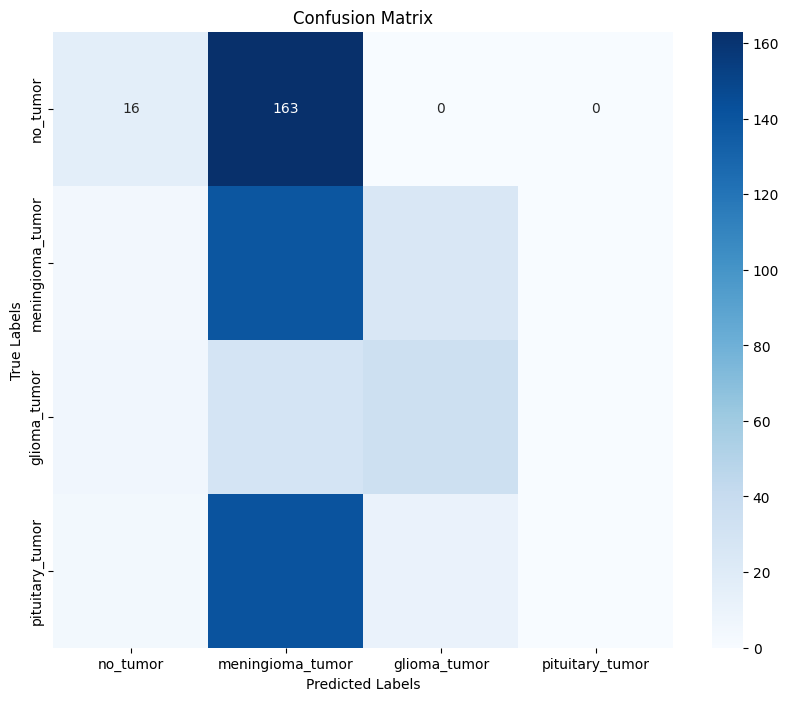

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
report = classification_report(y_val, val_predicted_labels, target_names=classes)
print(report)

                  precision    recall  f1-score   support

        no_tumor       0.52      0.09      0.15       179
meningioma_tumor       0.29      0.82      0.43       169
    glioma_tumor       0.49      0.50      0.50        70
 pituitary_tumor       0.00      0.00      0.00       156

        accuracy                           0.33       574
       macro avg       0.33      0.35      0.27       574
    weighted avg       0.31      0.33      0.24       574



/home/teki/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/teki/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/teki/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
with open("classification_report.txt", "w") as text_file:
    print(report, file=text_file)